# Laptop Price Prediction using XGBoost Regression
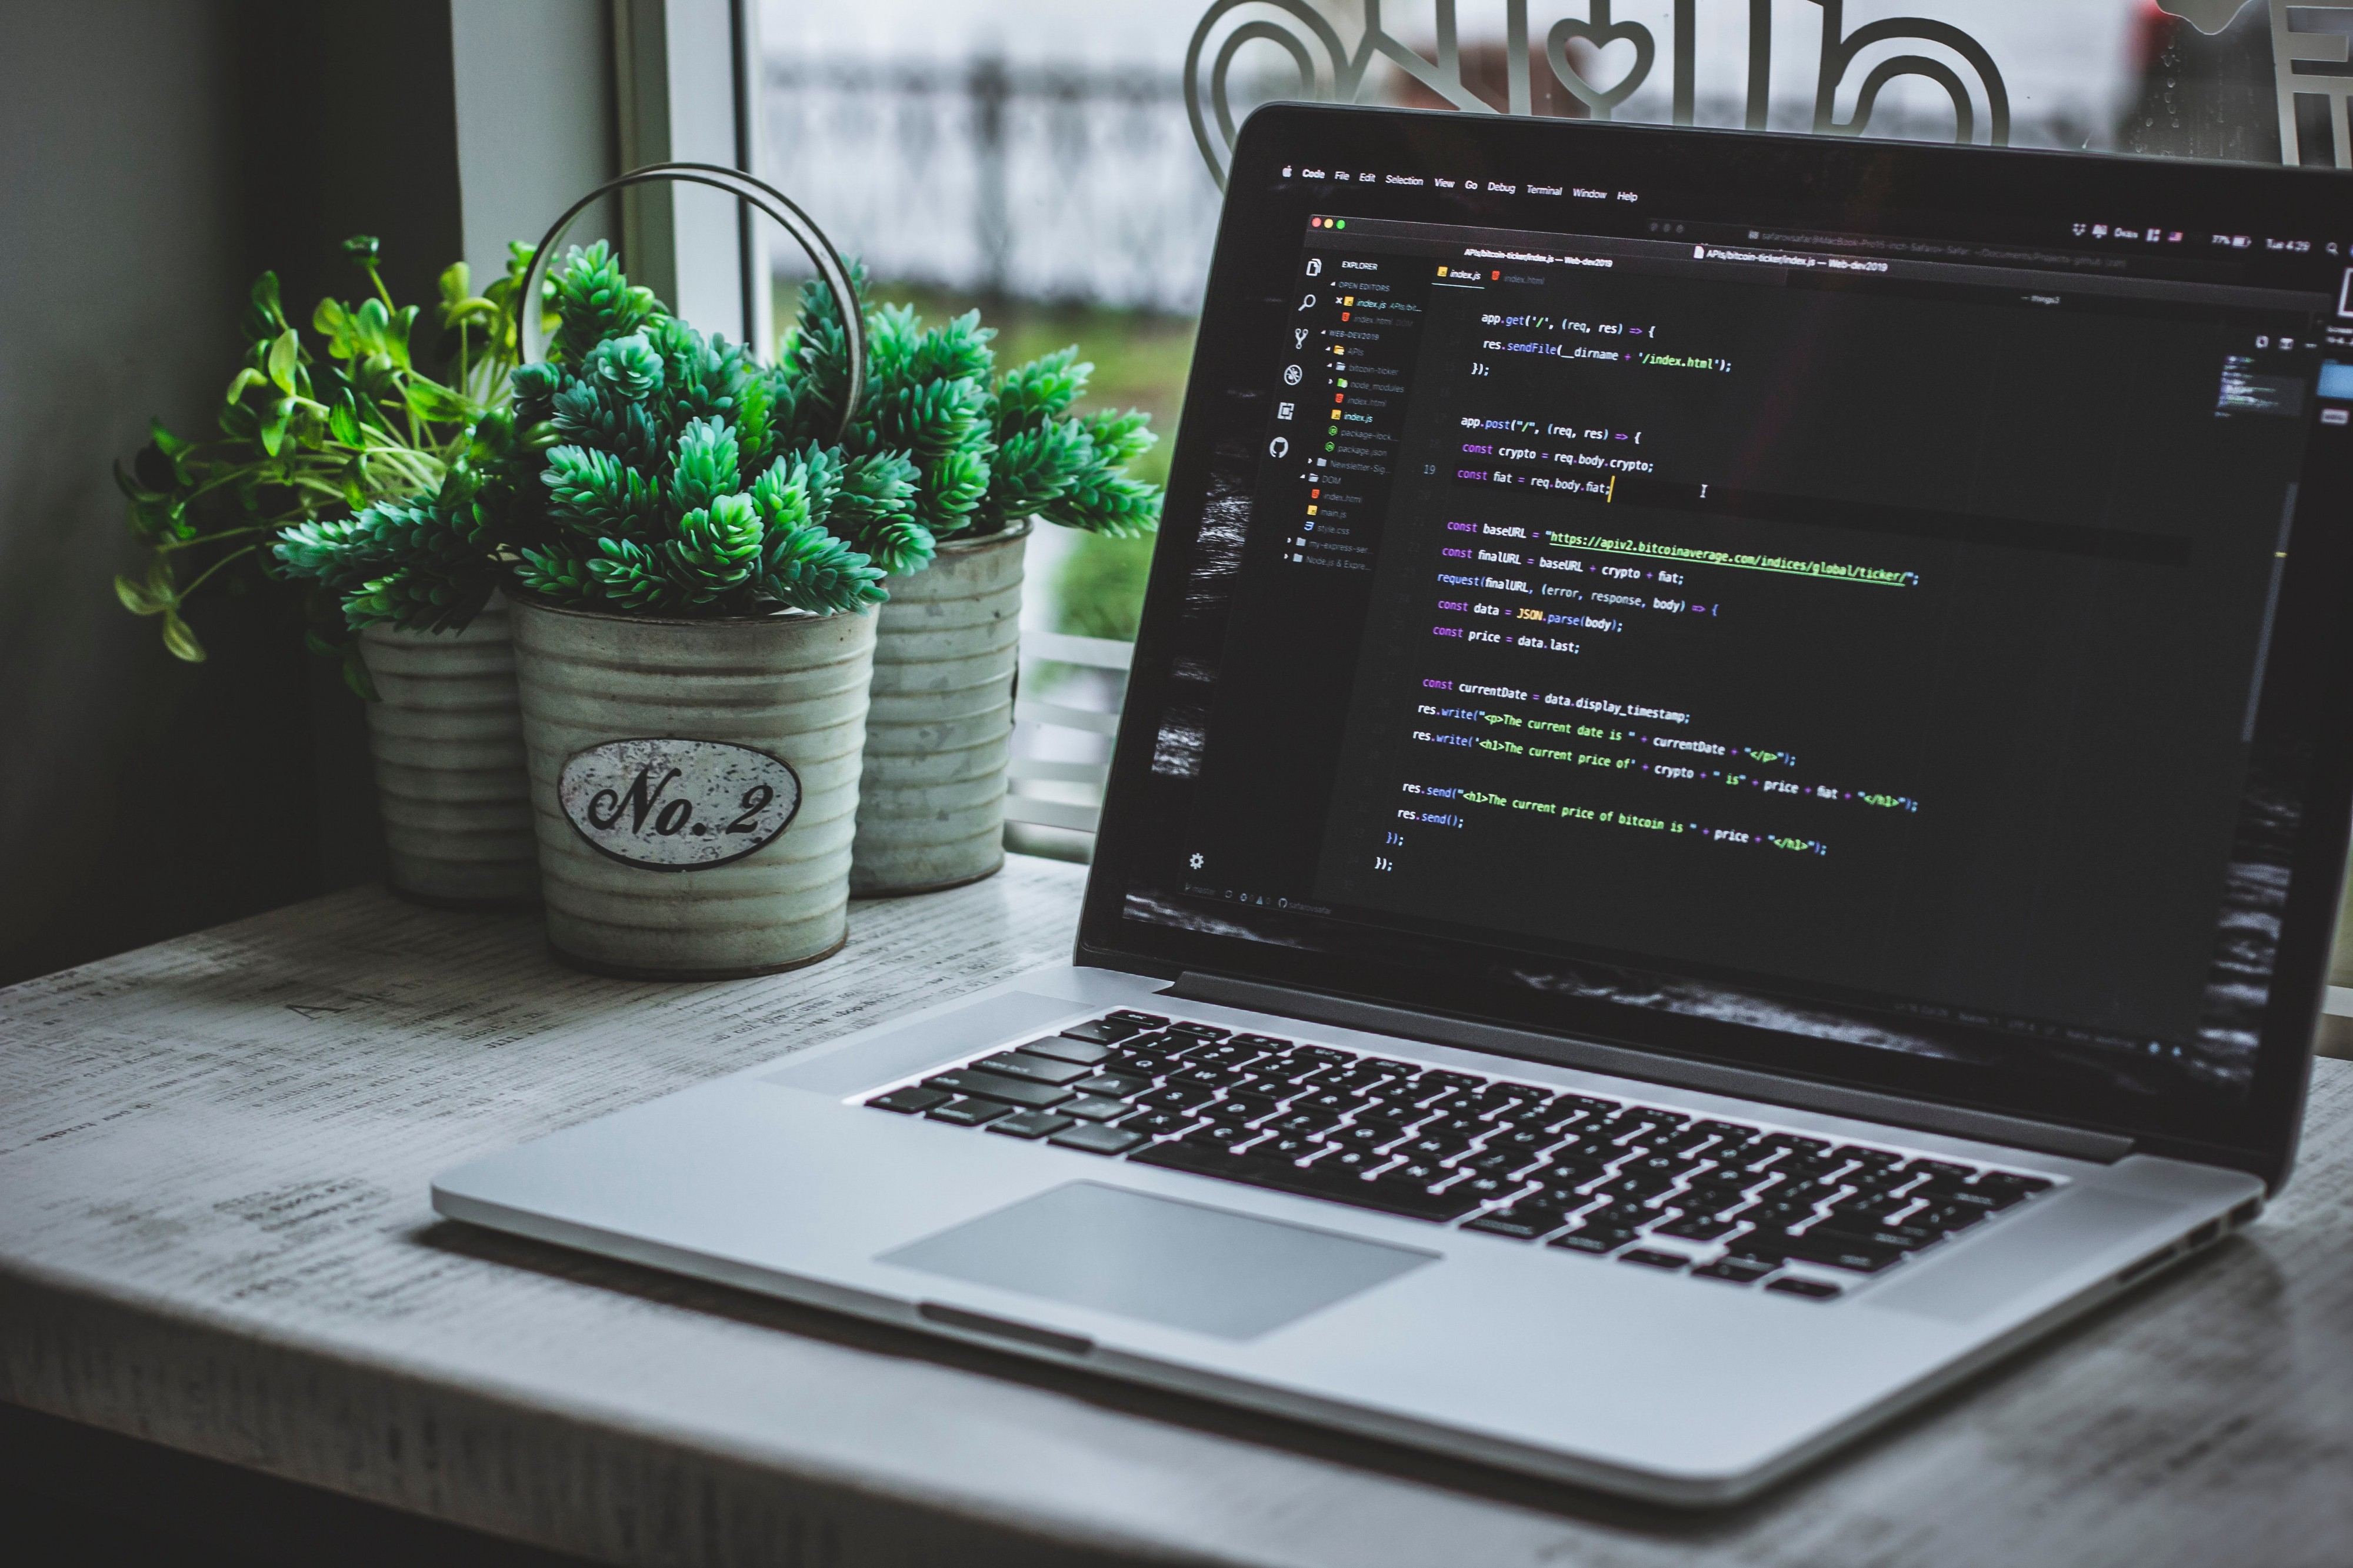

# Import Libraries

In [48]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Dataset

In [49]:
df = pd.read_csv("laptop_price.csv",encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [50]:
df.shape

(1303, 13)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [52]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# Data Clearning

<AxesSubplot:>

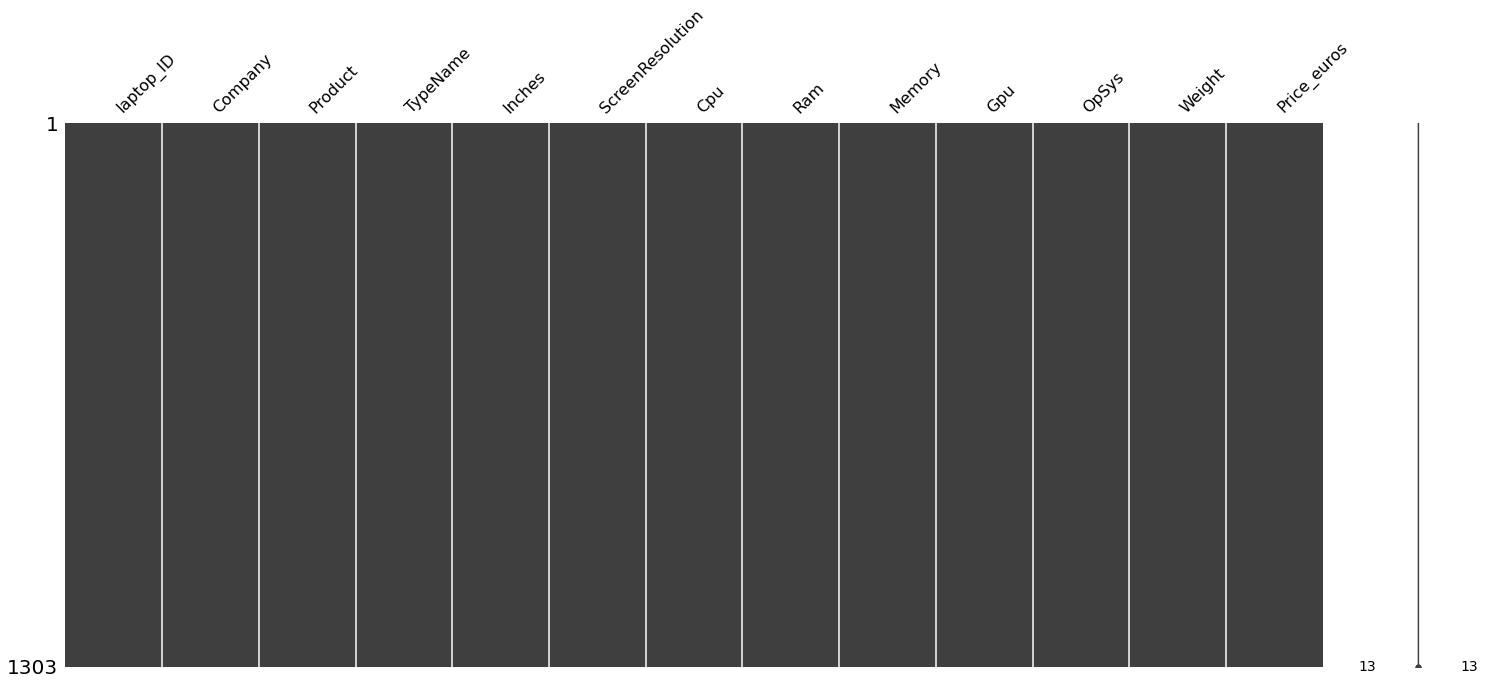

In [53]:
import missingno as m
m.matrix(df)

### Data is already Cleaned

In [54]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data PreProcessing

### Considering only the GPU company name and removing other part in GPU column

In [55]:
df['Gpu'] = df['Gpu'].str.split(' ').str[0]

In [56]:
df.Gpu.unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

### Converting laptop price from Euros to Rupees

In [57]:
df["Price_euros"] = 88.95 * df["Price_euros"]

### Renaming the Price_Euros column to Price_Rupees

In [58]:
df= df.rename(columns = {'Price_euros': 'Price_Rupees'}, inplace = False)

### Removing the Kg part from the column Weight 

In [59]:
df['Weight'] = df['Weight'].str.replace(r'.kg$', '')
df['Weight'] = pd.to_numeric(df['Weight'])

### Considering only the CPU name and removing other deatils 

In [60]:
df["Cpu"] = df["Cpu"].str.split().str[:3].str.join(sep=" ")

### Removing the GB part from Ram column

In [61]:
df['Ram'] = df['Ram'].astype(str).str[:-2].astype(np.int64)
df['Ram'] = pd.to_numeric(df['Ram'])

### Dropping the Laptop_ID column which is no use for our model

In [62]:
df = df.drop(columns='laptop_ID')

# Final Dataset

In [63]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_Rupees
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel,macOS,1.3,119165.4255
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel,macOS,1.3,79960.7130
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8,256GB SSD,Intel,No OS,1.8,51146.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD,macOS,1.8,225706.1775
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel,macOS,1.3,160430.2200


# Explanatory Data Analysis

In [64]:
fig = px.box(df, y="Price_Rupees",color='Cpu', points='all', title= "Laptop Price with Respect to CPU")
fig.show()

In [65]:
fig = px.box(df, y="Price_Rupees",color='Gpu',points='all', title='Laptop Price with respect to GPU')
fig.show()

In [66]:

fig = px.histogram(df, x="Company", color='TypeName', title="Company with Respect to Laptop Price")
fig.show()

In [67]:
fig = px.bar(df, y="Cpu", x='Gpu',color='TypeName', title = 'CPU, GPU with Typename')
fig.show()

In [69]:
fig = px.bar(df, x="Company", y='ScreenResolution', title='Company with Respect to Screen Resolution')
fig.show()

In [70]:
fig = px.scatter(df, x="Price_Rupees",y='Weight',color='Inches', title="Price and Weight with Respect to Laptop Screen Size in Inches")
fig.show()

In [71]:
fig = px.scatter_3d(df, x="Price_Rupees",y='Weight',z='Inches',color = 'Cpu', title='Price, Weight and Inches with respect to CPU')
fig.show()

In [72]:
fig = px.scatter_3d(df, x="Price_Rupees",y='Weight',z='Inches',color = 'Gpu',title='Price, Weight and Inches with respect to GPU')
fig.show()

In [73]:
fig = px.scatter_3d(df, x="Price_Rupees",y='Weight',z='Inches',color = 'Memory', title='Price, Weight and Inches with respect to Memory')
fig.show()

In [74]:
fig = px.scatter_3d(df, x="Price_Rupees",y='Weight',z='Inches',color = 'OpSys',title='Price, Weight and Inches with respect to Operating System')
fig.show()

# Putting Labels in all the Categorical Variable 

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df['Product'] = le.fit_transform(df['Product'])
df['TypeName'] = le.fit_transform(df['TypeName'])
df['Cpu'] = le.fit_transform(df['Cpu'])
df['Memory'] = le.fit_transform(df['Memory'])
df['Gpu'] = le.fit_transform(df['Gpu'])
df['OpSys'] = le.fit_transform(df['OpSys'])
df['ScreenResolution'] = le.fit_transform(df['ScreenResolution'])

# Heatmap

<AxesSubplot:>

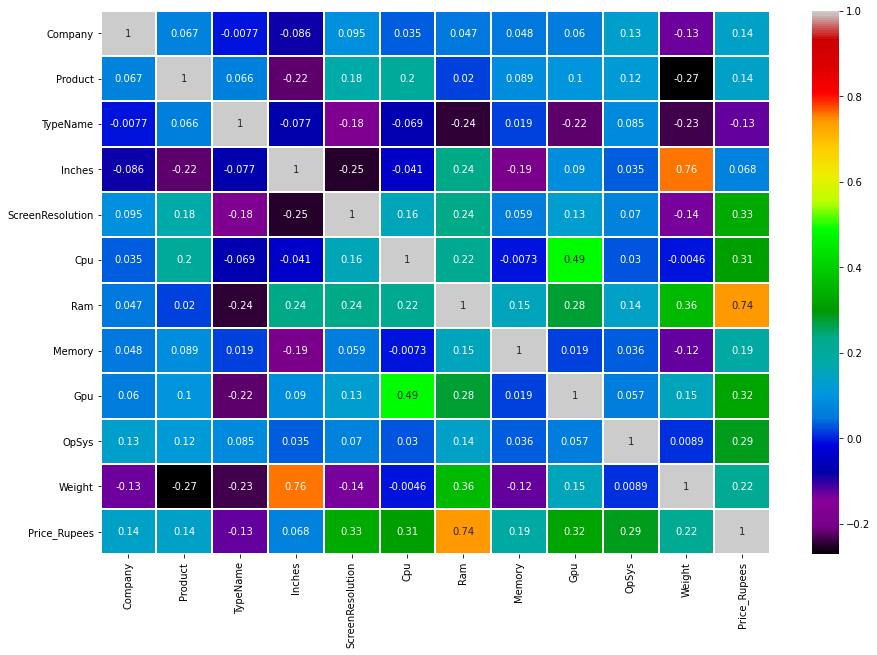

In [46]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, linewidth=1, cmap= "nipy_spectral")

In [28]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_Rupees
0,1,300,4,13.3,23,33,8,4,2,8,1.3,119165.4255
1,1,301,4,13.3,1,33,8,2,2,8,1.3,79960.7130
2,7,50,3,15.6,8,33,8,16,2,4,1.8,51146.2500
3,1,300,4,15.4,25,34,16,29,0,8,1.8,225706.1775
4,1,300,4,13.3,23,33,8,16,2,8,1.3,160430.2200


# Checking the Final Dataset information

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   Product           1303 non-null   int32  
 2   TypeName          1303 non-null   int32  
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   int32  
 5   Cpu               1303 non-null   int32  
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   int32  
 8   Gpu               1303 non-null   int32  
 9   OpSys             1303 non-null   int32  
 10  Weight            1253 non-null   float64
 11  Price_Rupees      1303 non-null   float64
dtypes: float64(3), int32(8), int64(1)
memory usage: 81.6 KB


# Columns

In [30]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_Rupees'],
      dtype='object')

# X and y Split

In [31]:
X= df[['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']]
y=df['Price_Rupees']

In [32]:
X.shape, y.shape

((1303, 11), (1303,))

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train.shape, y_train.shape

((977, 11), (977,))

In [36]:
X_test.shape, y_test.shape

((326, 11), (326,))

# Building XGBoost Regressor Model

In [37]:
import xgboost as xgb
xgreg = xgb.XGBRegressor()
xgreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Prediction for Test Set

In [38]:
y_pred=xgreg.predict(X_test)
y_pred

array([ 32989.34 , 242888.58 , 167101.88 ,  47244.24 , 179436.44 ,
        48943.97 ,  34893.992,  23098.52 ,  92811.27 , 215770.47 ,
       132762.   ,  53334.77 ,  26777.6  , 109586.53 , 300032.3  ,
        70347.54 ,  56441.78 , 185821.47 , 164080.14 , 191948.66 ,
        35566.574, 209745.47 ,  58963.418, 111233.7  ,  52039.08 ,
        67591.16 ,  78616.2  ,  68209.52 ,  66723.46 , 113011.5  ,
       105796.234,  63074.836, 110953.08 ,  73705.9  , 162751.83 ,
       120936.5  , 270962.12 ,  54760.832, 110685.97 , 179384.95 ,
       150168.42 , 122236.086, 489946.66 ,  85672.95 , 112871.38 ,
        48747.8  ,  91150.9  ,  46397.49 , 118277.086,  37201.45 ,
        74928.84 , 217487.25 ,  42899.496,  94866.75 ,  68255.94 ,
       113712.13 ,  27870.568, 108953.25 , 105884.43 , 175330.94 ,
       158433.03 ,  75813.63 ,  58877.812, 162946.7  , 133910.75 ,
       126607.016,  70944.   , 110053.26 ,  92102.88 , 138896.61 ,
        66279.65 , 133641.3  , 144428.   ,  38202.36 ,  51194.

In [39]:
y_test=y_test.values

# Predicted Value vs Actual Value

In [40]:
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(data)

[[ 32989.33984375  34601.55      ]
 [242888.578125   264003.6       ]
 [167101.875      165358.05      ]
 [ 47244.23828125  54491.6595    ]
 [179436.4375     213213.15      ]
 [ 48943.96875     52178.07      ]
 [ 34893.9921875   35580.        ]
 [ 23098.51953125  40908.105     ]
 [ 92811.2734375  101803.275     ]
 [215770.46875    266761.05      ]
 [132762.         185816.55      ]
 [ 53334.76953125  48833.55      ]
 [ 26777.59960938  17701.05      ]
 [109586.53125     91974.3       ]
 [300032.3125     112877.55      ]
 [ 70347.5390625   68295.81      ]
 [ 56441.78125     44297.1       ]
 [185821.46875    171584.55      ]
 [164080.140625   186706.05      ]
 [191948.65625    168916.05      ]
 [ 35566.57421875  28819.8       ]
 [209745.46875    233049.        ]
 [ 58963.41796875  59461.296     ]
 [111233.703125   119637.75      ]
 [ 52039.078125    48028.5525    ]
 [ 67591.15625     65556.15      ]
 [ 78616.203125    93842.25      ]
 [ 68209.5234375   57728.55      ]
 [ 66723.4609375   7

# Storing the Values into a Dataframe

In [41]:
dataset = pd.DataFrame({'y_pred': data[:, 0], 'y_test': data[:, 1]})
dataset.to_csv('prediction.csv')

In [42]:
dataset = pd.read_csv('prediction.csv')


# Model Evaluation

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_tweedie_deviance

mse = mean_squared_error(y_test, y_pred)
print("MSE Score :", mse)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred)
print("R2 Score :",r2_score)

max_error = max_error(y_test, y_pred)
print("Max Error :",max_error)

mean_absolute_error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mean_absolute_error)



median_absolute_error = median_absolute_error(y_test, y_pred)
print("Median Absolute Error :",median_absolute_error)



mean_tweedie_deviance = mean_tweedie_deviance(y_test, y_pred)
print("Mean Tweedie Deviance :",mean_tweedie_deviance)



MSE Score : 784038551.8591181
RMSE Score : 28000.688417592846
R2 Score : 0.8150813020916767
Max Error : 187154.7625
Mean Absolute Error : 17728.989103048316
Median Absolute Error : 10619.797656249997
Mean Tweedie Deviance : 784038551.8591181


# Actual value vs Predicted Value Plot

In [45]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_test'], name='Actual Value',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_pred'], name = 'Predicted Value',
                         line=dict(color='firebrick', width=2)))


# This Model can Predict Price of a Laptop Very Efficiently